In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.utils import np_utils

In [6]:
data = pd.read_csv("Datasets/fashion-mnist_test.csv")

In [7]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [36]:
data = pd.read_csv("Datasets/fashion-mnist_test.csv")
x = data.values
X = x[:,1:]
y = x[:,0]
X = X/255.0

y = np_utils.to_categorical(y)
print (X.shape, y.shape)

(10000, 784) (10000, 10)


In [39]:
X_train = X[:8000,:]
y_train = y[:8000,:]

X_val = X[8000:,:]
y_val = y[8000:,:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(8000, 784) (8000, 10)
(2000, 784) (2000, 10)


In [59]:
#Sequential

mdl = Sequential()
mdl.add(Dense(256, activation='relu', input_shape=(784,)))
mdl.add(Dense(64, activation='relu'))
mdl.add(Dense(10, activation='softmax'))

mdl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [60]:
adam = Adam(decay=0.0001)

In [61]:
mdl.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'] )

In [67]:
history = mdl.fit(X_train, y_train, epochs=10, batch_size=200, shuffle=True, validation_data=(X_val,y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 37us/step - loss: 0.2990 - acc: 0.8910 - val_loss: 0.3890 - val_acc: 0.8630
Epoch 2/10
8000/8000 [==============================] - 0s 34us/step - loss: 0.2931 - acc: 0.8931 - val_loss: 0.3932 - val_acc: 0.8605
Epoch 3/10
8000/8000 [==============================] - 0s 34us/step - loss: 0.2712 - acc: 0.9043 - val_loss: 0.3735 - val_acc: 0.8730
Epoch 4/10
8000/8000 [==============================] - 0s 51us/step - loss: 0.2708 - acc: 0.9006 - val_loss: 0.4256 - val_acc: 0.8495
Epoch 5/10
8000/8000 [==============================] - 0s 41us/step - loss: 0.2553 - acc: 0.9082 - val_loss: 0.3657 - val_acc: 0.8735
Epoch 6/10
8000/8000 [==============================] - 0s 32us/step - loss: 0.2433 - acc: 0.9131 - val_loss: 0.3464 - val_acc: 0.8795
Epoch 7/10
8000/8000 [==============================] - 0s 34us/step - loss: 0.2305 - acc: 0.9178 - val_loss: 0.3635 - val_acc: 0.8715
Epoch 8

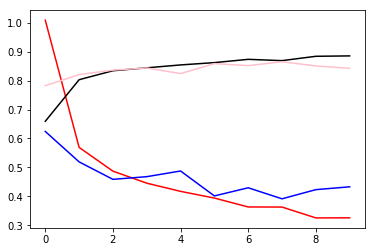

In [78]:
# SGD

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

In [73]:
#Functional

inp = Input(shape=(784,))
d1 = Dense(256, activation='relu')(inp)
d2 = Dense(64, activation='relu')(d1)

d3 = Dense(10, activation='softmax')(d2)

model = Model(inputs=[inp],outputs=[d3])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_35 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [74]:
adam = Adam(decay=0.0001)

In [75]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [76]:
history = model.fit(X,y,epochs=10,batch_size=200,shuffle=True, validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 84us/step - loss: 1.0091 - acc: 0.6595 - val_loss: 0.6243 - val_acc: 0.7825
Epoch 2/10
8000/8000 [==============================] - 0s 34us/step - loss: 0.5692 - acc: 0.8034 - val_loss: 0.5190 - val_acc: 0.8210
Epoch 3/10
8000/8000 [==============================] - 0s 35us/step - loss: 0.4870 - acc: 0.8344 - val_loss: 0.4586 - val_acc: 0.8365
Epoch 4/10
8000/8000 [==============================] - 0s 45us/step - loss: 0.4454 - acc: 0.8445 - val_loss: 0.4679 - val_acc: 0.8440
Epoch 5/10
8000/8000 [==============================] - 0s 41us/step - loss: 0.4171 - acc: 0.8545 - val_loss: 0.4875 - val_acc: 0.8245
Epoch 6/10
8000/8000 [==============================] - 0s 33us/step - loss: 0.3939 - acc: 0.8625 - val_loss: 0.4012 - val_acc: 0.8590
Epoch 7/10
8000/8000 [==============================] - 0s 47us/step - loss: 0.3631 - acc: 0.8739 - val_loss: 0.4295 - val_acc: 0.8520
Epoch 8

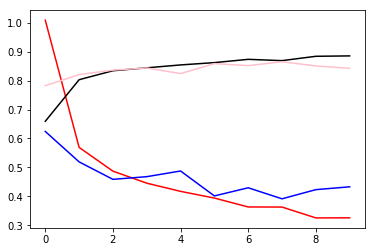

In [77]:

# Adam with decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()